# Скачиваем документы

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
data = pd.read_csv("universities_final_data.csv", encoding='cp437')
del data['url'],data['location'], data['country_name'], data['iso2_code'], data['iso3_code'], data['heritage_year']

Удалям признаки: ..., так как

In [250]:
data

,name,country,qs_ranking_preview,the_ranking_preview,arwu_ranking_preview,bachelor_from,bachelor_to,master_from,master_to,doctorate_from,...,female_students,acceptance_rate,qs_rating,the_rating,rating_usa,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score
0,Harvard University,US,4.0,3.0,1.0,"7,918","60,144","7,748","78,067","11,128",...,50%,3%,#4,#3,#1,2.918489e+13,4.106,79.361931,NaN,70.2
1,Massachusetts Institute of Technology,US,1.0,2.0,3.0,"61,990","61,990","61,990","144,000","61,990",...,40%,4%,#1,#2,#3,2.918489e+13,4.106,79.361931,NaN,70.2
2,Stanford University,US,6.0,6.0,2.0,"43,406","58,400","26,473","143,106","25,433",...,46%,4%,#6,#6,#2,2.918489e+13,4.106,79.361931,NaN,70.2
3,University of Cambridge,GB,5.0,5.0,4.0,"30,895","44,584","10,910","70,626","13,053",...,47%,12%,#5,#5,NaN,3.643834e+12,4.111,80.498772,NaN,69.3
4,California Institute of Technology,US,10.0,7.0,9.0,"56,364","60,816","54,570","60,816","54,570",...,36%,3%,#10,#7,#19,2.918489e+13,4.106,79.361931,NaN,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Stillman College,US,NaN,NaN,NaN,"11,389","11,389","12,497","12,497",NaN,...,NaN,65%,NaN,NaN,NaN,2.918489e+13,4.106,79.361931,NaN,70.2
9996,IMT Alti Studi Lucca,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.372775e+12,6.778,75.949654,99.349998,60.9
9997,National Academy of Santa Cecilia,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.372775e+12,6.778,75.949654,99.349998,60.9
9998,Dayananda Sagar College of Engineering,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.912686e+12,4.202,34.418466,81.699997,53.0


# Удаляем дубликаты

In [251]:
print(f"Изначально: {len(data)}")

Изначально: 10000


In [252]:
data_no_full_dupes = data.drop_duplicates()
rows1 = data_no_full_dupes.shape[0]
print(f"После удаления полных дублей: {rows1}")

После удаления полных дублей: 10000


Дубликаты не нашлись, так что ничего удалять не надо


# Начинаем работать с пропусками

Есть ли пропущенные значения? Сколько? Какова их доля от общего числа объектов для каждого конкретного признака? И, в целом, насколько ваш датасет “разрежен” в контексте пропущенных значений? Выдвинуть и (желательно) проверить гипотезу, что могут означать пропущенные значения? Осмысленно и аргументированно обработать пропуски.

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    10000 non-null  object 
 1   country                 9981 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   the_ranking_preview     1320 non-null   float64
 4   arwu_ranking_preview    895 non-null    float64
 5   bachelor_from           4417 non-null   object 
 6   bachelor_to             4417 non-null   object 
 7   master_from             4065 non-null   object 
 8   master_to               4065 non-null   object 
 9   doctorate_from          461 non-null    object 
 10  doctorate_to            461 non-null    object 
 11  location_full           9986 non-null   object 
 12  establishment_year      7858 non-null   float64
 13  total_students          5573 non-null   object 
 14  international_students  2129 non-null  

In [254]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

data_missing = pd.DataFrame({
    'Количество пропусков': missing_count.values,
    'Доля (%)': missing_percent.round(2)
}).sort_values(by='Количество пропусков', ascending=False)

display(data_missing)

,Количество пропусков,Доля (%)
rating_usa,9833,98.33
doctorate_from,9539,95.39
doctorate_to,9539,95.39
arwu_ranking_preview,9105,91.05
the_rating,8984,89.84
qs_rating,8947,89.47
the_ranking_preview,8680,86.80
qs_ranking_preview,8629,86.29
female_students,8376,83.76
international_students,7871,78.71


In [255]:
data = data.replace(r'^\s*$', np.nan, regex=True) # \s* — любое количество пробелов, табов или переводов строк; ^ и $ — границы строки, чтобы совпадение шло по всей ячейке

In [256]:
total_missing = data.isnull().sum().sum()
total_cells = data.shape[0] * data.shape[1]
sparsity = total_missing / total_cells * 100
print(f"Общая разреженность: {sparsity:.2f}%")

Общая разреженность: 52.94%


Гипотезы:

# 1. убрали пропуск по стране

In [257]:
data[data["country"].isna()]

,name,country,qs_ranking_preview,the_ranking_preview,arwu_ranking_preview,bachelor_from,bachelor_to,master_from,master_to,doctorate_from,...,female_students,acceptance_rate,qs_rating,the_rating,rating_usa,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score
767,Vasyl' Stus Donetsk National University,NaN,NaN,NaN,NaN,"2,500","2,500","2,500","2,500",NaN,...,NaN,50%,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
1603,Polytechnic of Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
1772,Eastern Mediterranean University,NaN,611.0,601.0,NaN,"2,506","22,858",500,"5,389",NaN,...,42%,NaN,#616,#701,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
2844,University of Luhansk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
4192,Kherson State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
4655,Near East University,NaN,NaN,601.0,NaN,NaN,NaN,NaN,NaN,NaN,...,44%,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
5188,Mariupol State University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
5792,Girne American University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
6766,East Ukrainian Volodymyr Dahl National University,NaN,NaN,NaN,NaN,"5,000","5,000","5,000","5,000",NaN,...,NaN,40%,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7
6926,Donetsk National Technical University,NaN,NaN,NaN,NaN,"2,500","2,500","2,500","2,500",NaN,...,NaN,60%,NaN,NaN,NaN,1.337235e+10,19.148,26.109265,87.639999,58.7


In [258]:
data.loc[data["country"].isna(), "country"] = "NA"

# 2. удалили строки с пропусками по целевой переменной

In [259]:
data=data.dropna(subset=['qs_ranking_preview'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 0 to 9505
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   the_ranking_preview     898 non-null    float64
 4   arwu_ranking_preview    689 non-null    float64
 5   bachelor_from           1153 non-null   object 
 6   bachelor_to             1153 non-null   object 
 7   master_from             1154 non-null   object 
 8   master_to               1154 non-null   object 
 9   doctorate_from          335 non-null    object 
 10  doctorate_to            335 non-null    object 
 11  location_full           1371 non-null   object 
 12  establishment_year      1324 non-null   float64
 13  total_students          1295 non-null   object 
 14  international_students  1246 non-null   objec

# 3. удалили лишние признаки

Удаляем также след признаки, так как ...

In [260]:
del data['the_ranking_preview'], data['the_rating'], data['arwu_ranking_preview'], data['rating_usa'], data['qs_rating'], data['doctorate_from'], data['doctorate_to']

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 0 to 9505
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   bachelor_from           1153 non-null   object 
 4   bachelor_to             1153 non-null   object 
 5   master_from             1154 non-null   object 
 6   master_to               1154 non-null   object 
 7   location_full           1371 non-null   object 
 8   establishment_year      1324 non-null   float64
 9   total_students          1295 non-null   object 
 10  international_students  1246 non-null   object 
 11  female_students         948 non-null    object 
 12  acceptance_rate         560 non-null    object 
 13  gdp                     1327 non-null   float64
 14  unemployment_rate       1327 non-null   float

# 4. думаем, что делать с acceptance rate

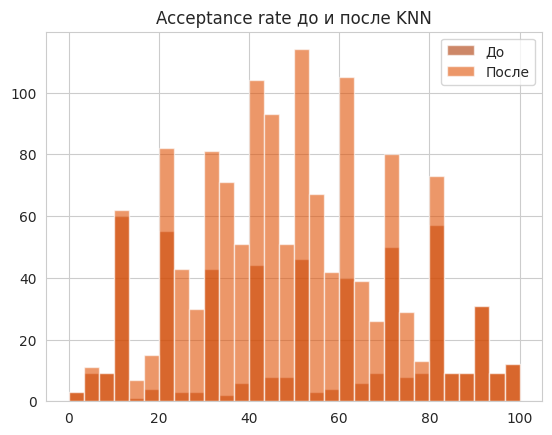

In [262]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# переводим acceptance_rate в число
data.loc[:, "acceptance_rate"] = (
    data["acceptance_rate"].astype(str)
    .str.replace("%", "")
    .str.replace(",", "")
    .astype(float)
)

data = data.sort_values("qs_ranking_preview").reset_index(drop=True)

# кодируем страны числом (т.к. KNN не работает с текстом)
data["country_encoded"] = LabelEncoder().fit_transform(data["country"].astype(str))

# KNN для заполнения пропусков
imputer = KNNImputer(n_neighbors=5)
data["acceptance_rate_filled"] = imputer.fit_transform(
    data[["qs_ranking_preview", "country_encoded", "acceptance_rate"]]
)[:, 2]# берём заполненные значения acceptance_rate, т.е. 3 столбца

plt.hist(data["acceptance_rate"].dropna(), bins=30, alpha=0.6, label="До")
plt.hist(data["acceptance_rate_filled"], bins=30, alpha=0.6, label="После")
plt.legend(); plt.title("Acceptance rate до и после KNN"); plt.show()




In [263]:
print(data.columns.tolist())

['name', 'country', 'qs_ranking_preview', 'bachelor_from', 'bachelor_to', 'master_from', 'master_to', 'location_full', 'establishment_year', 'total_students', 'international_students', 'female_students', 'acceptance_rate', 'gdp', 'unemployment_rate', 'school_enrollment_tert', 'adult_literacy_rate', 'economic_freedom_score', 'country_encoded', 'acceptance_rate_filled']


In [264]:
del data['acceptance_rate_filled'], data['country_encoded']

In [265]:
print(data.columns.tolist())

['name', 'country', 'qs_ranking_preview', 'bachelor_from', 'bachelor_to', 'master_from', 'master_to', 'location_full', 'establishment_year', 'total_students', 'international_students', 'female_students', 'acceptance_rate', 'gdp', 'unemployment_rate', 'school_enrollment_tert', 'adult_literacy_rate', 'economic_freedom_score']


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   bachelor_from           1153 non-null   object 
 4   bachelor_to             1153 non-null   object 
 5   master_from             1154 non-null   object 
 6   master_to               1154 non-null   object 
 7   location_full           1371 non-null   object 
 8   establishment_year      1324 non-null   float64
 9   total_students          1295 non-null   object 
 10  international_students  1246 non-null   object 
 11  female_students         948 non-null    object 
 12  acceptance_rate         560 non-null    object 
 13  gdp                     1327 non-null   float64
 14  unemployment_rate       1327 non-null   

**!!!!Тут обосновать !!!!!!**



# 5. что получается до FE

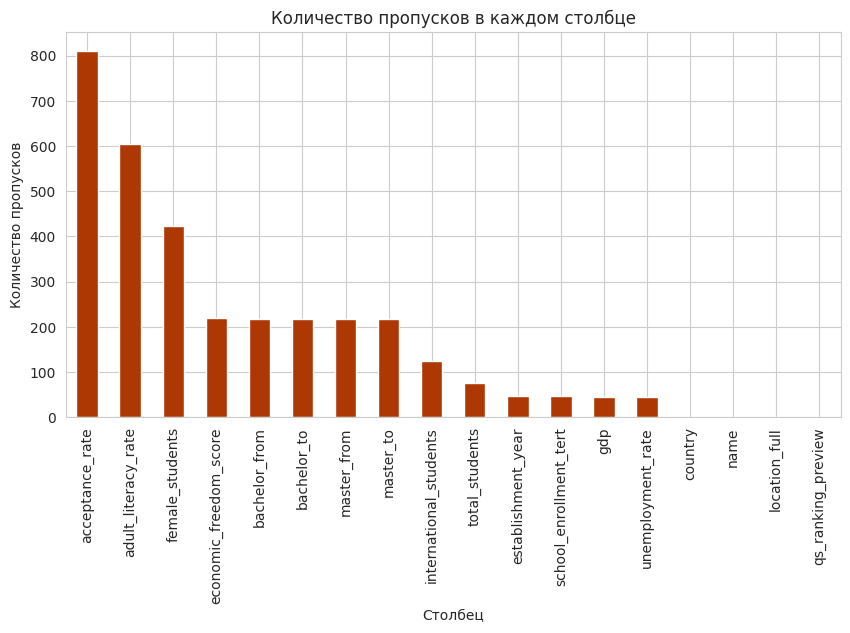

In [267]:
missing = data.isnull().sum().sort_values(ascending=False)

missing.plot(kind='bar', figsize=(10, 5))
plt.title("Количество пропусков в каждом столбце")
plt.xlabel("Столбец")
plt.ylabel("Количество пропусков")
plt.show()

In [268]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

data_missing = pd.DataFrame({
    'Количество пропусков': missing_count.values,
    'Доля (%)': missing_percent.round(2)
}).sort_values(by='Количество пропусков', ascending=False)

display(data_missing)

,Количество пропусков,Доля (%)
acceptance_rate,811,59.15
adult_literacy_rate,605,44.13
female_students,423,30.85
economic_freedom_score,219,15.97
bachelor_from,218,15.90
bachelor_to,218,15.90
master_from,217,15.83
master_to,217,15.83
international_students,125,9.12
total_students,76,5.54


In [269]:
total_missing = data.isnull().sum().sum()
total_cells = data.shape[0] * data.shape[1]
sparsity = total_missing / total_cells * 100
print(f"Общая разреженность: {sparsity:.2f}%")

Общая разреженность: 13.41%


# FE - заполняем пропуски на основе нового признака из старого и объединение признаков

добавим столбец - континент к нашим странам, чтоб сгруппировать по ним и дополнить столбец - грамотность

In [270]:
!pip install pycountry-convert

In [271]:
import pycountry_convert as pc

continent_map = {
    'AF': 'Africa',
    'AN': 'Antarctica',
    'AS': 'Asia',
    'EU': 'Europe',
    'NA': 'North America',
    'OC': 'Australia',
    'SA': 'South America'
}

def get_continent(country):
    try:
        code = pc.country_alpha2_to_continent_code(country)
        return continent_map.get(code)
    except:
        return None

data["continent"] = data["country"].apply(get_continent)

print(data[["country", "continent"]].head())

  country      continent
0      US  North America
1      GB         Europe
2      GB         Europe
3      US  North America
4      GB         Europe


In [272]:
missing = data[data["continent"].isna()]
missing

,name,country,qs_ranking_preview,bachelor_from,bachelor_to,master_from,master_to,location_full,establishment_year,total_students,international_students,female_students,acceptance_rate,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score,continent


дополним сами одну страну

In [273]:
data.loc[data["country"] == "Namibia", "continent"] = "Africa"

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   bachelor_from           1153 non-null   object 
 4   bachelor_to             1153 non-null   object 
 5   master_from             1154 non-null   object 
 6   master_to               1154 non-null   object 
 7   location_full           1371 non-null   object 
 8   establishment_year      1324 non-null   float64
 9   total_students          1295 non-null   object 
 10  international_students  1246 non-null   object 
 11  female_students         948 non-null    object 
 12  acceptance_rate         560 non-null    object 
 13  gdp                     1327 non-null   float64
 14  unemployment_rate       1327 non-null   

In [275]:
continent_means = data.groupby("continent")[
    ["adult_literacy_rate", "gdp", "economic_freedom_score", "school_enrollment_tert", "unemployment_rate"]
].mean()

def fill_by_continent(row):
    for col in ["adult_literacy_rate", "gdp", "economic_freedom_score", "school_enrollment_tert", "unemployment_rate"]:
        if pd.isna(row[col]):
            row[col] = continent_means.loc[row["continent"], col]
    return row

data = data.apply(fill_by_continent, axis=1)

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1371 non-null   object 
 1   country                 1371 non-null   object 
 2   qs_ranking_preview      1371 non-null   float64
 3   bachelor_from           1153 non-null   object 
 4   bachelor_to             1153 non-null   object 
 5   master_from             1154 non-null   object 
 6   master_to               1154 non-null   object 
 7   location_full           1371 non-null   object 
 8   establishment_year      1324 non-null   float64
 9   total_students          1295 non-null   object 
 10  international_students  1246 non-null   object 
 11  female_students         948 non-null    object 
 12  acceptance_rate         560 non-null    float64
 13  gdp                     1371 non-null   float64
 14  unemployment_rate       1371 non-null   

In [277]:
missing_literacy = data[data["adult_literacy_rate"].isna()]

print(f"Количество строк без adult_literacy_rate: {len(missing_literacy)}")
missing_literacy[["country", "continent", "adult_literacy_rate"]]

Количество строк без adult_literacy_rate: 45


,country,continent,adult_literacy_rate
12,AU,Australia,NaN
17,AU,Australia,NaN
18,AU,Australia,NaN
26,AU,Australia,NaN
33,AU,Australia,NaN
36,AU,Australia,NaN
59,NZ,Australia,NaN
70,AU,Australia,NaN
80,AU,Australia,NaN
114,AU,Australia,NaN


объединяем столбцы - "bachelor_from", "bachelor_to",
берем среднее по ним

In [278]:
for c in ["bachelor_from", "bachelor_to"]:
    data[c] = pd.to_numeric( # ф-ия numeric переводит значения в числа
        data[c].astype(str).str.replace(",", "").str.replace(" ", ""), # убираем запятые и пробелы
        errors="coerce" # если не число - Nan
    )

data["avg_bachelor"] = data[["bachelor_from", "bachelor_to"]].mean(axis=1)
del data['bachelor_from'], data['bachelor_to']

In [279]:
data.head()

,name,country,qs_ranking_preview,master_from,master_to,location_full,establishment_year,total_students,international_students,female_students,acceptance_rate,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score,continent,avg_bachelor
0,Massachusetts Institute of Technology,US,1.0,"61,990","144,000","Boston, United States",1861.0,"11,839","3,650",40%,4.0,2.918489e+13,4.106,79.361931,95.471840,70.2,North America,61990.0
1,Imperial College London,GB,2.0,"16,286","89,375","London, United Kingdom",1907.0,"20,135","10,965",40%,NaN,3.643834e+12,4.111,80.498772,99.071921,69.3,Europe,57365.5
2,University of Oxford,GB,3.0,"6,104","133,910","Oxford, United Kingdom",1096.0,"20,785","7,565",47%,23.0,3.643834e+12,4.111,80.498772,99.071921,69.3,Europe,138617.0
3,Harvard University,US,4.0,"7,748","78,067","Cambridge, United States",1636.0,"29,236","10,077",50%,3.0,2.918489e+13,4.106,79.361931,95.471840,70.2,North America,34031.0
4,University of Cambridge,GB,5.0,"10,910","70,626","Cambridge, United Kingdom",1318.0,"19,875","7,340",47%,12.0,3.643834e+12,4.111,80.498772,99.071921,69.3,Europe,37739.5


ан-но объединяем столбцы - "master_from", "master_to", берем среднее по ним

In [280]:
for c in ["master_from", "master_to"]:
    data[c] = pd.to_numeric( # ф-ия numeric переводит значения в числа
        data[c].astype(str).str.replace(",", "").str.replace(" ", ""), # убираем запятые и пробелы
        errors="coerce" # если не число - Nan
    )

data["avg_master"] = data[["master_from", "master_to"]].mean(axis=1)
del data['master_from'], data['master_to']

In [281]:
data.sample(20)

,name,country,qs_ranking_preview,location_full,establishment_year,total_students,international_students,female_students,acceptance_rate,gdp,unemployment_rate,school_enrollment_tert,adult_literacy_rate,economic_freedom_score,continent,avg_bachelor,avg_master
309,Indian Institute of Technology Roorkee,IN,335.0,"Roorkee, India",1847.0,"7,561",151,NaN,10.0,3.912686e+12,4.202,34.418466,81.699997,53.000000,Asia,467.0,590.0
734,New Jersey Institute of Technology,US,791.0,"Newark, United States",1881.0,"11,678","2,250",26%,66.0,2.918489e+13,4.106,79.361931,95.471840,70.200000,North America,31344.0,30920.0
986,National Technological University,AR,1001.0,"Buenos Aires, Argentina",1948.0,"46,231",814,NaN,NaN,6.332667e+11,7.876,107.822574,99.139999,54.200000,South America,1000.0,1000.0
1362,San Pablo Bolivian Catholic University,BO,1401.0,"La Paz, Bolivia",1966.0,NaN,439,NaN,NaN,4.966830e+10,3.091,79.020144,95.550003,44.100000,South America,NaN,NaN
816,North-West University,ZA,851.0,"Potchefstroom, South Africa",2004.0,"36,749","1,470",61%,70.0,4.002607e+11,33.168,23.493769,91.150002,57.300000,Africa,NaN,NaN
1072,Lviv Polytechnic,UA,1001.0,"Lviv, Ukraine",1844.0,"21,334",297,41%,NaN,1.907413e+11,9.834,85.266760,99.430000,69.111082,Europe,1924.5,2299.0
775,Catholic University of Korea,KR,801.0,"Bucheon-si, South Korea",NaN,NaN,NaN,60%,NaN,1.712793e+12,2.604,106.709167,97.970001,59.980769,Asia,NaN,NaN
1346,indian institute of informatics allahabad,IN,1401.0,India,1999.0,NaN,31,NaN,NaN,3.912686e+12,4.202,34.418466,81.699997,53.000000,Asia,NaN,NaN
1367,"La Salle University, Colombia",CO,1401.0,"Bogota, Colombia",1964.0,"9,869",95,NaN,NaN,4.185420e+11,9.608,59.290138,95.339996,59.800000,South America,NaN,NaN
86,Moscow State University,RU,94.0,"Moscow, Russia",1755.0,"29,235","8,478",NaN,NaN,2.173836e+12,2.527,60.389124,99.930000,69.111082,Europe,5199.0,6259.5


добавим возраст как новый признак

In [282]:
data["university_age"] = 2025 - data["establishment_year"]

смотрим, что в итоге

In [283]:
missing_count = data.isnull().sum()
missing_percent = (missing_count / len(data)) * 100

data_missing = pd.DataFrame({
    'Количество пропусков': missing_count.values,
    'Доля (%)': missing_percent.round(2)
}).sort_values(by='Количество пропусков', ascending=False)

display(data_missing)

,Количество пропусков,Доля (%)
acceptance_rate,811,59.15
female_students,423,30.85
avg_bachelor,218,15.90
avg_master,217,15.83
international_students,125,9.12
total_students,76,5.54
establishment_year,47,3.43
university_age,47,3.43
adult_literacy_rate,45,3.28
name,0,0.00


In [284]:
total_missing = data.isnull().sum().sum()
total_cells = data.shape[0] * data.shape[1]
sparsity = total_missing / total_cells * 100
print(f"Общая разреженность: {sparsity:.2f}%")

Общая разреженность: 8.14%


In [285]:
data["qs_rank_inverted"] = data["qs_ranking_preview"].max() - data["qs_ranking_preview"] + 1

In [286]:
data["acceptance_rate_inverted"] = 100 - data["acceptance_rate"]

# Проверяем есть ли ошибочные

Есть ли ошибочные (например, отрицательный возраст или пятиметровый рост человека; 3-й класс в задаче бинарной классификации) значения (признаки, целевая переменная) в данных? Обработать их.

Мы уже проверили на дубликаты и обработали пропуски, так что в категориальных ошибкок нет

Проверям вещественные:

adult_literacy_rate должен быть от 0 до 100 %

unemployment_rate должен быть от 0 до 100 %


acceptance_rate  - от 0 до 100 %


economic_freedom_score - от 0 до 100

gdp не может быть отрицательным

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1371 non-null   object 
 1   country                   1371 non-null   object 
 2   qs_ranking_preview        1371 non-null   float64
 3   location_full             1371 non-null   object 
 4   establishment_year        1324 non-null   float64
 5   total_students            1295 non-null   object 
 6   international_students    1246 non-null   object 
 7   female_students           948 non-null    object 
 8   acceptance_rate           560 non-null    float64
 9   gdp                       1371 non-null   float64
 10  unemployment_rate         1371 non-null   float64
 11  school_enrollment_tert    1371 non-null   float64
 12  adult_literacy_rate       1326 non-null   float64
 13  economic_freedom_score    1371 non-null   float64
 14  continen

In [288]:
cols = ["adult_literacy_rate", "unemployment_rate", "acceptance_rate",
        "economic_freedom_score", "gdp"]

for c in cols:
    temp = pd.to_numeric(data[c], errors='coerce') # errors='coerce' = если не число — ставим NaN (временно)
    mistake = temp[(temp < 0) | (temp > 100)] if c != "gdp" else temp[temp < 0]
    print(f"{c}: {mistake.count()} ошибок")

adult_literacy_rate: 0 ошибок
unemployment_rate: 0 ошибок
acceptance_rate: 0 ошибок
economic_freedom_score: 0 ошибок
gdp: 0 ошибок


# Проверяем есть ли выбросы в данных и изучаем поведение каждого признака в отдельности

Есть ли выбросы в данных? По возможности обработать их.

In [289]:
print(data.columns.tolist())

['name', 'country', 'qs_ranking_preview', 'location_full', 'establishment_year', 'total_students', 'international_students', 'female_students', 'acceptance_rate', 'gdp', 'unemployment_rate', 'school_enrollment_tert', 'adult_literacy_rate', 'economic_freedom_score', 'continent', 'avg_bachelor', 'avg_master', 'university_age', 'qs_rank_inverted', 'acceptance_rate_inverted']


In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      1371 non-null   object 
 1   country                   1371 non-null   object 
 2   qs_ranking_preview        1371 non-null   float64
 3   location_full             1371 non-null   object 
 4   establishment_year        1324 non-null   float64
 5   total_students            1295 non-null   object 
 6   international_students    1246 non-null   object 
 7   female_students           948 non-null    object 
 8   acceptance_rate           560 non-null    float64
 9   gdp                       1371 non-null   float64
 10  unemployment_rate         1371 non-null   float64
 11  school_enrollment_tert    1371 non-null   float64
 12  adult_literacy_rate       1326 non-null   float64
 13  economic_freedom_score    1371 non-null   float64
 14  continen

In [291]:
num_cols = data.select_dtypes(include='number').columns
print(num_cols)

Index(['qs_ranking_preview', 'establishment_year', 'acceptance_rate', 'gdp',
       'unemployment_rate', 'school_enrollment_tert', 'adult_literacy_rate',
       'economic_freedom_score', 'avg_bachelor', 'avg_master',
       'university_age', 'qs_rank_inverted', 'acceptance_rate_inverted'],
      dtype='object')


qs_ranking_preview - числа уникальные от 1 до 1401 (нет смысла смотреть выбросы)

establishment_year - разумнее сделать распределение, потому что могут быть очень старые университеты, которые нужно будет не обработать, а проаналищировать как длительное существование на рынке университетов помогло вузу воысить рейтинг (а может наоборот позить или удерживать стабильно а одном уровне)

# gdp

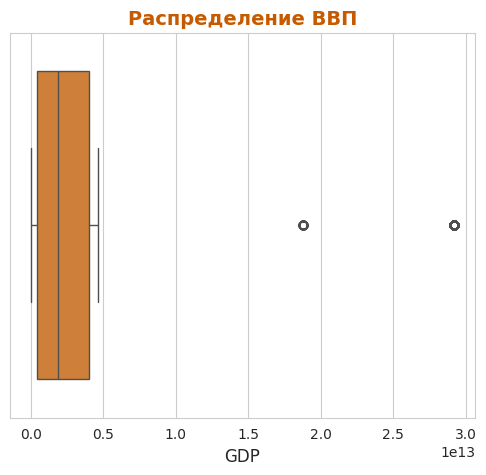

In [292]:
sns.set_style("whitegrid")
sns.set_palette("Oranges_r")

plt.figure(figsize=(6, 5))
sns.boxplot(x=data["gdp"], color="#e67e22")
plt.title("Распределение ВВП", fontsize=14, weight="bold", color="#c65a00")
plt.xlabel("GDP", fontsize=12)
plt.show()

In [293]:
data["gdp_log"] = np.log1p(data["gdp"])

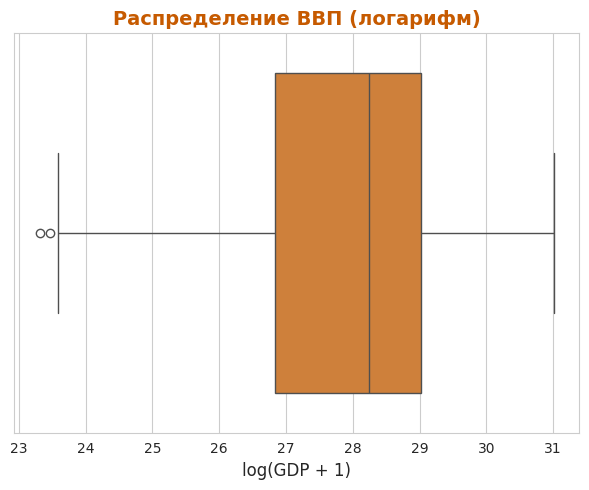

In [294]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["gdp_log"], color="#e67e22")
plt.title("Распределение ВВП (логарифм)", fontsize=14, weight="bold", color="#c65a00")
plt.xlabel("log(GDP + 1)", fontsize=12)
plt.tight_layout()
plt.show()

In [295]:
data[["gdp", "gdp_log"]].describe()

,gdp,gdp_log
count,1.371000e+03,1371.000000
mean,6.092045e+12,28.196160
std,9.748547e+12,1.693773
min,1.337235e+10,23.316455
25%,4.501194e+11,26.832779
50%,1.852723e+12,28.247678
75%,4.015418e+12,29.021163
max,2.918489e+13,31.004672


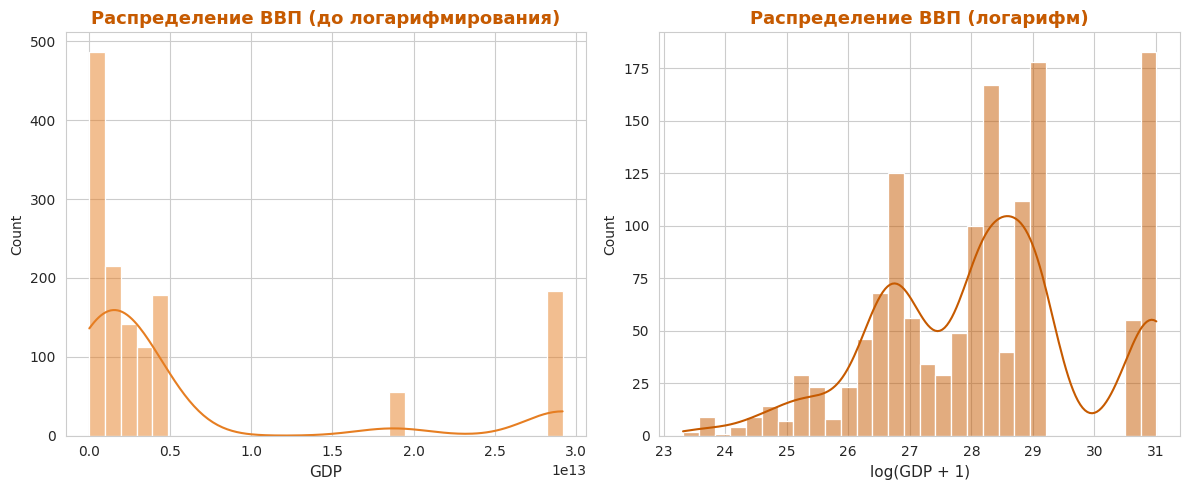

In [296]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(
    data["gdp"],
    bins=30, kde=True, ax=axes[0],
    color="#e67e22"
)
axes[0].set_title("Распределение ВВП (до логарифмирования)", fontsize=13, weight="bold", color="#c65a00")
axes[0].set_xlabel("GDP", fontsize=11)
sns.histplot(
    data["gdp_log"],
    bins=30, kde=True, ax=axes[1],
    color="#c65a00"
)
axes[1].set_title("Распределение ВВП (логарифм)", fontsize=13, weight="bold", color="#c65a00")
axes[1].set_xlabel("log(GDP + 1)", fontsize=11)
plt.tight_layout()
plt.show()


После логарифмирования значения ВВП сжались в диапазоне 23–31, распределение стало более ровным и симметричным: среднее 28.17, стандартное отклонение 1.71, и исчез сильный перекос вправо (большинство стран имеют низкий ВВП (высокий столбец слева), а несколько стран с очень большим ВВП создают длинный хвост)

Вывод: большее количество университетов сосредоточено в странах с высоким уровнем ВВП — развитая экономика способствует инвестициям в образование, привлечению преподавателей и студентов.

Распределение:  большинство стран имеют сравнительно низкий или средний уровень ВВП, а распределение скошено вправо из-за небольшого числа экономически сильных стран. После логарифмирования значения ВВП стали более сбалансированными и равномерно распределёнными

# unemployment_rate

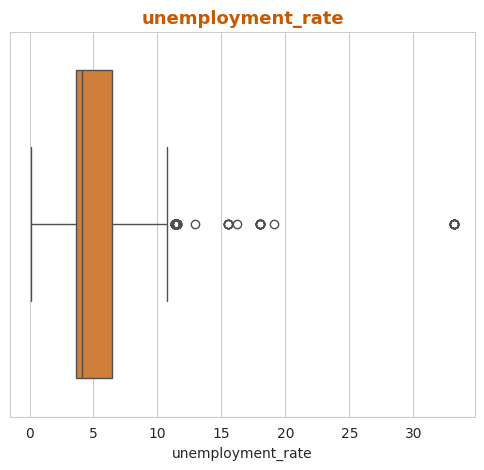

In [297]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["unemployment_rate"], color="#e67e22")
plt.title("unemployment_rate", fontsize=13, weight="bold", color="#c65a00")
plt.show()

In [298]:
data["unemployment_rate_log"] = np.log1p(data["unemployment_rate"])

In [299]:
data[["unemployment_rate", "unemployment_rate_log"]].describe()

,unemployment_rate,unemployment_rate_log
count,1371.000000,1371.000000
mean,5.334550,1.746377
std,3.624003,0.417678
min,0.126000,0.118672
25%,3.599000,1.525839
50%,4.111000,1.631395
75%,6.450000,2.008214
max,33.168000,3.531290


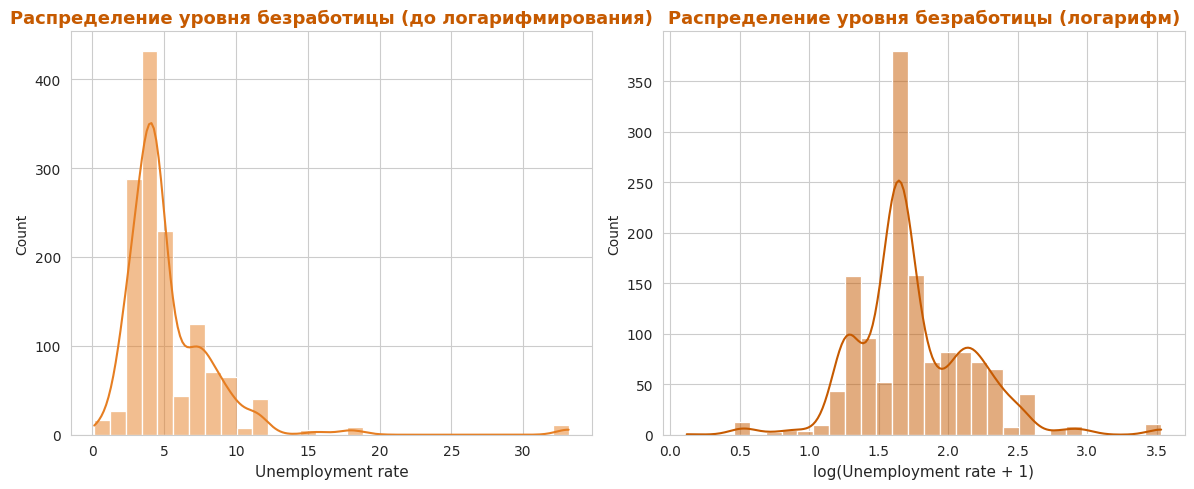

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(
    data["unemployment_rate"],
    bins=30, kde=True, ax=axes[0],
    color="#e67e22",
)
axes[0].set_title("Распределение уровня безработицы (до логарифмирования)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[0].set_xlabel("Unemployment rate", fontsize=11)

sns.histplot(
    data["unemployment_rate_log"],
    bins=30, kde=True, ax=axes[1],
    color="#c65a00"
)
axes[1].set_title("Распределение уровня безработицы (логарифм)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[1].set_xlabel("log(Unemployment rate + 1)", fontsize=11)

plt.tight_layout()
plt.show()


Распределение скошено вправо — большинство стран имеют безработицу <10%.
После логарифмирования данные стали симметричнее.

Больше университетов сосредоточено в странах с низкой безработицей —
там стабильный рынок труда и высокий спрос на образование.

# school_enrollment_tert

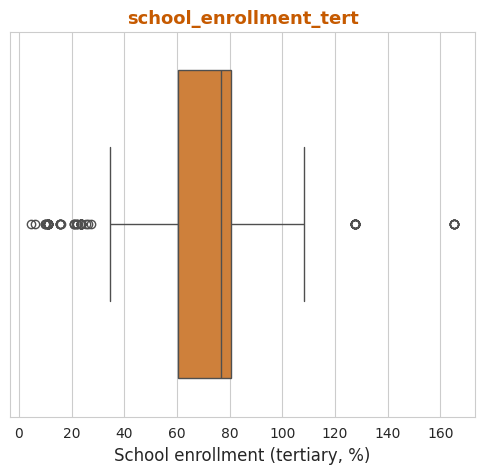

In [301]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["school_enrollment_tert"], color="#e67e22")
plt.title("school_enrollment_tert", fontsize=13, weight="bold", color="#c65a00")
plt.xlabel("School enrollment (tertiary, %)", fontsize=12)
plt.show()

In [302]:
data["school_enrollment_tert_log"] = np.log1p(data["school_enrollment_tert"])
data[["school_enrollment_tert_log", "school_enrollment_tert"]].describe()

,school_enrollment_tert_log,school_enrollment_tert
count,1371.000000,1371.000000
mean,4.221431,71.785537
std,0.405495,23.015941
min,1.726154,4.619000
25%,4.117233,60.389124
50%,4.355115,76.875784
75%,4.400588,80.498772
max,5.112671,165.113419


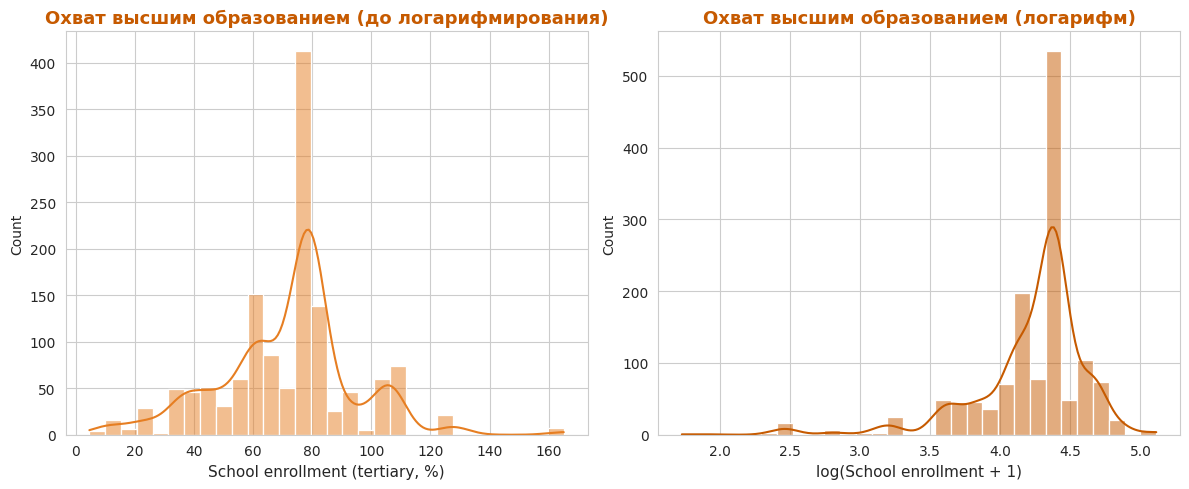

In [303]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(
    data["school_enrollment_tert"],
    bins=30, kde=True, ax=axes[0],
    color="#e67e22"
)
axes[0].set_title("Охват высшим образованием (до логарифмирования)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[0].set_xlabel("School enrollment (tertiary, %)", fontsize=11)

sns.histplot(
    data["school_enrollment_tert_log"],
    bins=30, kde=True, ax=axes[1],
    color="#c65a00"
)
axes[1].set_title("Охват высшим образованием (логарифм)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[1].set_xlabel("log(School enrollment + 1)", fontsize=11)

plt.tight_layout()
plt.show()


Распределение: изначально было довольно равномерным, с небольшим смещением вправо — большинство стран имеют охват высшим образованием от 50% до 100%. После логарифмирования форма распределения почти не изменилась, что говорит о стабильности и отсутствии выбросов.

Вывод: показатель охвата высшим образованием устойчив и слабо подвержен искажениям. Это отражает сбалансированное развитие образовательных систем и стабильный интерес к получению высшего образования в большинстве стран.


In [304]:
del data['school_enrollment_tert_log']

# adult_literacy_rate

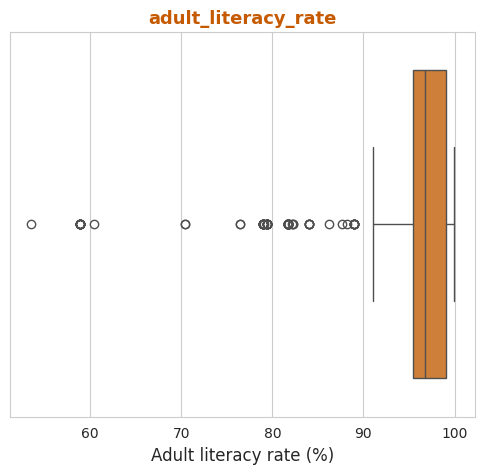

In [305]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["adult_literacy_rate"], color="#e67e22")
plt.title("adult_literacy_rate", fontsize=13, weight="bold", color="#c65a00")
plt.xlabel("Adult literacy rate (%)", fontsize=12)
plt.show()

In [306]:
data["adult_literacy_rate_log"] = np.log1p(data["adult_literacy_rate"])
data[["adult_literacy_rate_log", "adult_literacy_rate"]].describe()

,adult_literacy_rate_log,adult_literacy_rate
count,1326.000000,1326.000000
mean,4.567011,95.485152
std,0.072435,6.068737
min,3.998568,53.520000
25%,4.569251,95.471840
50%,4.582311,96.739998
75%,4.605889,99.071921
max,4.614427,99.930000


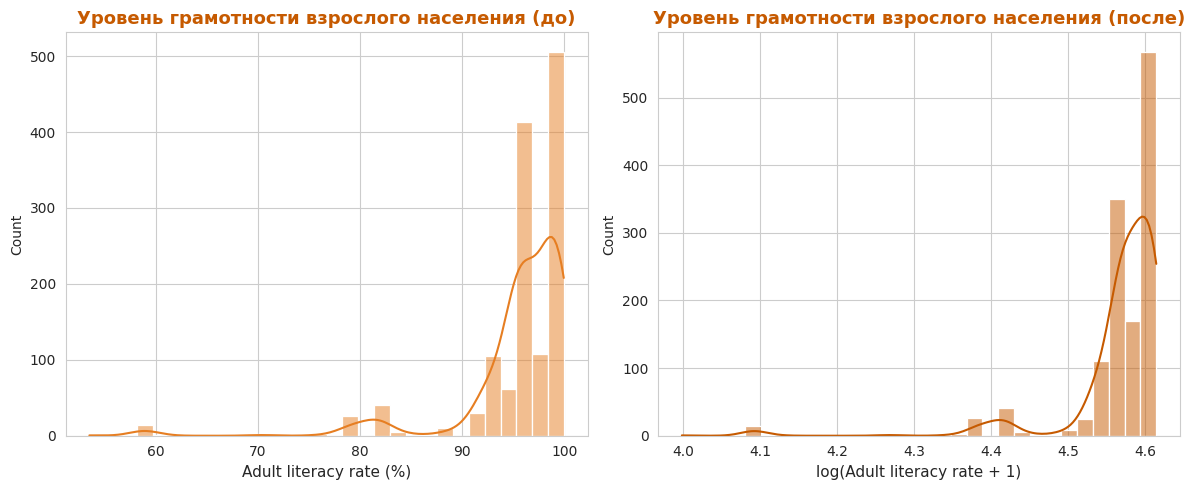

In [307]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    data["adult_literacy_rate"],
    bins=30, kde=True, ax=axes[0],
    color="#e67e22"
)
axes[0].set_title("Уровень грамотности взрослого населения (до)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[0].set_xlabel("Adult literacy rate (%)", fontsize=11)

sns.histplot(
    data["adult_literacy_rate_log"],
    bins=30, kde=True, ax=axes[1],
    color="#c65a00"
)
axes[1].set_title("Уровень грамотности взрослого населения (после)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[1].set_xlabel("log(Adult literacy rate + 1)", fontsize=11)

plt.tight_layout()
plt.show()


Распределение: показатель adult_literacy_rate имеет перекос влево, так как большинство стран обладают высоким уровнем грамотности. Логарифмирование не дало существенного эффекта, поэтому признак можно оставить без преобразования.

Вывод: высокая грамотность населения связана с развитой системой образования и высоким качеством университетов.
Такие страны формируют устойчивый спрос на высшее образование и создают благоприятную среду для академического роста.

In [308]:
del data['adult_literacy_rate_log']

# economic_freedom_score

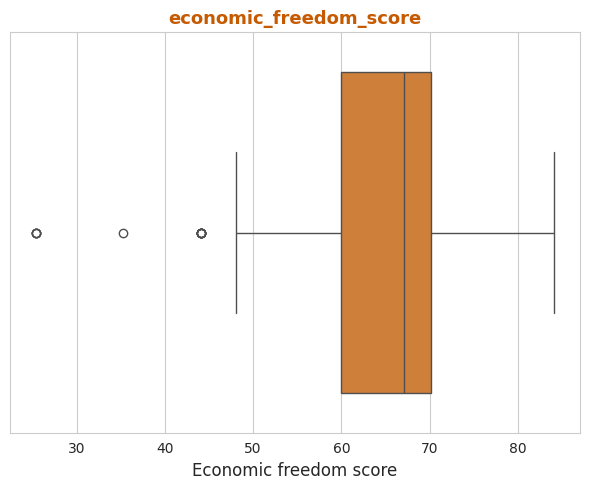

In [309]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["economic_freedom_score"], color="#e67e22")
plt.title("economic_freedom_score", fontsize=13, weight="bold", color="#c65a00")
plt.xlabel("Economic freedom score", fontsize=12)
plt.tight_layout()
plt.show()

In [310]:
data["economic_freedom_score_log"] = np.log(data["economic_freedom_score"])
data[["economic_freedom_score_log", "economic_freedom_score"]].describe()

,economic_freedom_score_log,economic_freedom_score
count,1371.000000,1371.000000
mean,4.168493,65.197927
std,0.137640,8.329469
min,3.234749,25.400000
25%,4.094024,59.980769
50%,4.206184,67.100000
75%,4.251348,70.200000
max,4.432007,84.100000


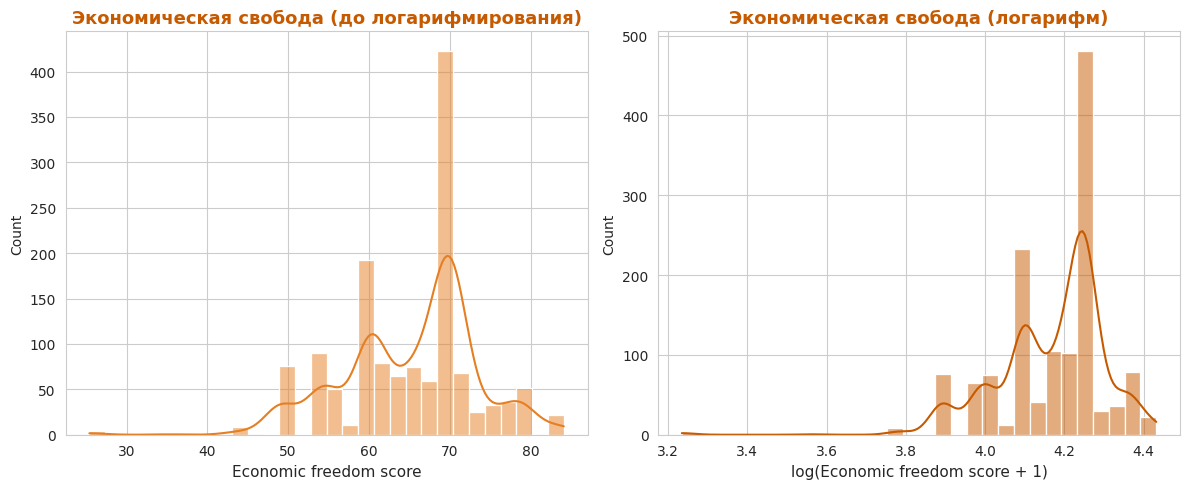

In [311]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    data["economic_freedom_score"],
    bins=30, kde=True, ax=axes[0],
    color="#e67e22"
)
axes[0].set_title("Экономическая свобода (до логарифмирования)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[0].set_xlabel("Economic freedom score", fontsize=11)

sns.histplot(
    data["economic_freedom_score_log"],
    bins=30, kde=True, ax=axes[1],
    color="#c65a00"
)
axes[1].set_title("Экономическая свобода (логарифм)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[1].set_xlabel("log(Economic freedom score + 1)", fontsize=11)

plt.tight_layout()
plt.show()


Распределение: умеренно симметричное, без выраженных выбросов — большинство стран находятся в диапазоне 60–80 баллов. После логарифмирования форма практически не изменилась, признак стабилен.

Вывод: высокая экономическая свобода характерна для развитых стран с устойчивыми институтами и низкими барьерами для бизнеса, что способствует автономии и росту качества университетов.

# avg_bachelor

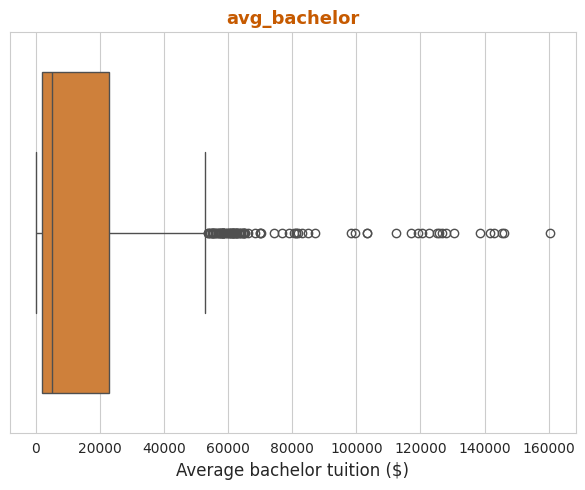

In [312]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["avg_bachelor"], color="#e67e22")  # тёплая оранжевая заливка
plt.title("avg_bachelor", fontsize=13, weight="bold", color="#c65a00")
plt.xlabel("Average bachelor tuition ($)", fontsize=12)
plt.tight_layout()
plt.show()

In [313]:
data["avg_bachelor_log"] = np.log(data["avg_bachelor"])
data[["avg_bachelor_log", "avg_bachelor"]].describe()

,avg_bachelor_log,avg_bachelor
count,1153.000000,1153.000000
mean,8.731521,16213.688638
std,1.518863,22895.939869
min,3.912023,50.000000
25%,7.659643,2121.000000
50%,8.534050,5085.000000
75%,10.032672,22758.000000
max,11.985703,160444.500000


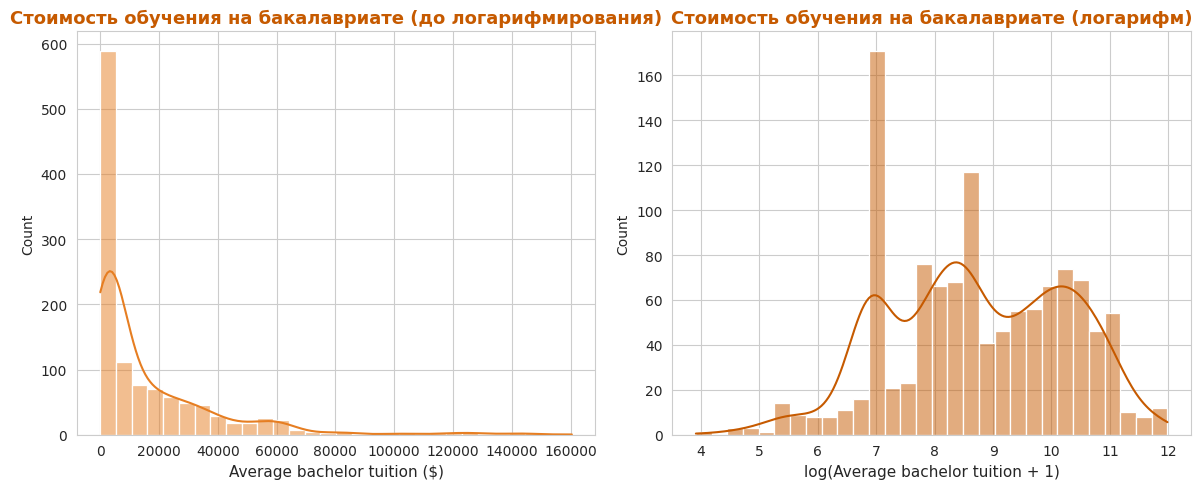

In [314]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    data["avg_bachelor"],
    bins=30, kde=True, ax=axes[0],
    color="#e67e22"
)
axes[0].set_title("Стоимость обучения на бакалавриате (до логарифмирования)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[0].set_xlabel("Average bachelor tuition ($)", fontsize=11)

sns.histplot(
    data["avg_bachelor_log"],
    bins=30, kde=True, ax=axes[1],
    color="#c65a00"
)
axes[1].set_title("Стоимость обучения на бакалавриате (логарифм)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[1].set_xlabel("log(Average bachelor tuition + 1)", fontsize=11)

plt.tight_layout()
plt.show()


In [315]:
data["avg_bachelor_log"] = np.log1p(data["avg_bachelor"])

Распределение: скошено вправо — большинство университетов имеют низкую стоимость, но есть несколько дорогих выбросов. После логарифмирования данные стали более симметричными.

Вывод: высокая стоимость обучения характерна для развитых стран и престижных вузов, где велик спрос на качественное образование и сильна конкуренция.

# avg_master

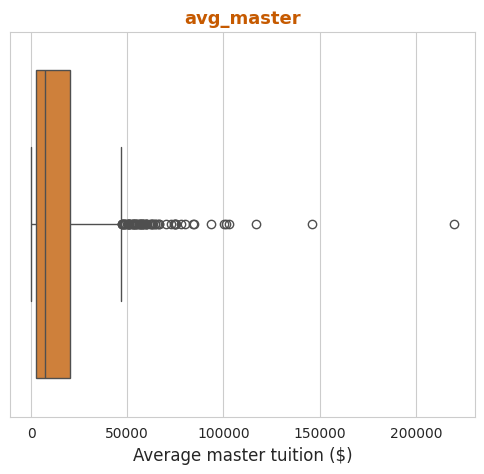

In [316]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data["avg_master"], color="#e67e22")
plt.title("avg_master", fontsize=13, weight="bold", color="#c65a00")
plt.xlabel("Average master tuition ($)", fontsize=12)
plt.show()

In [317]:
data["avg_master_log"] = np.log1p(data["avg_master"])

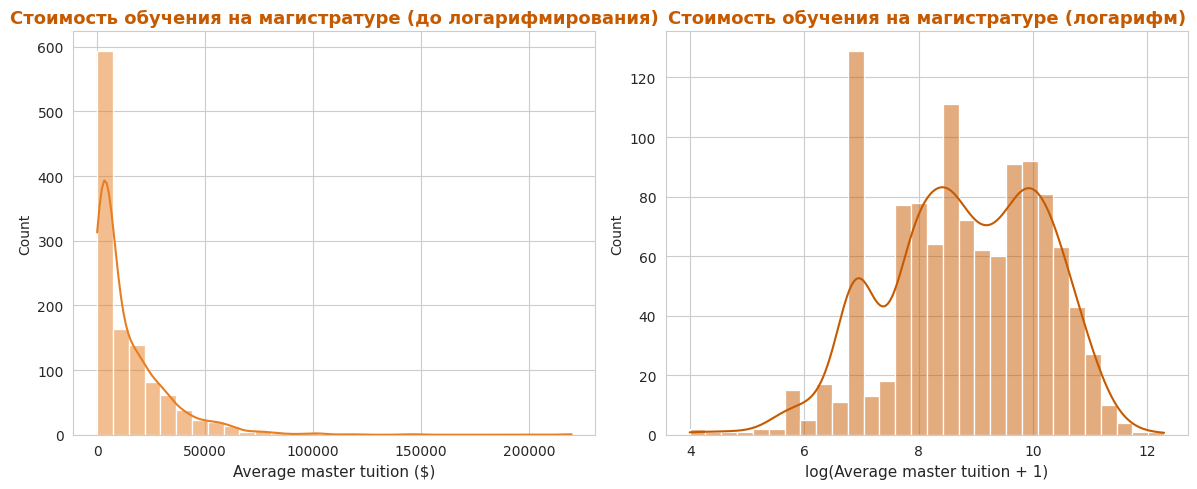

In [318]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    data["avg_master"],
    bins=30, kde=True, ax=axes[0],
    color="#e67e22"
)
axes[0].set_title("Стоимость обучения на магистратуре (до логарифмирования)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[0].set_xlabel("Average master tuition ($)", fontsize=11)

sns.histplot(
    data["avg_master_log"],
    bins=30, kde=True, ax=axes[1],
    color="#c65a00"
)
axes[1].set_title("Стоимость обучения на магистратуре (логарифм)",
                  fontsize=13, weight="bold", color="#c65a00")
axes[1].set_xlabel("log(Average master tuition + 1)", fontsize=11)

plt.tight_layout()
plt.show()


Распределение: скошено вправо — большинство университетов имеют умеренную стоимость, но встречаются редкие дорогие программы. После логарифмирования распределение стало более равномерным.

Вывод: высокая стоимость магистратуры характерна для ведущих университетов и специализированных программ, где образование даёт дополнительную ценность и престиж.

# country


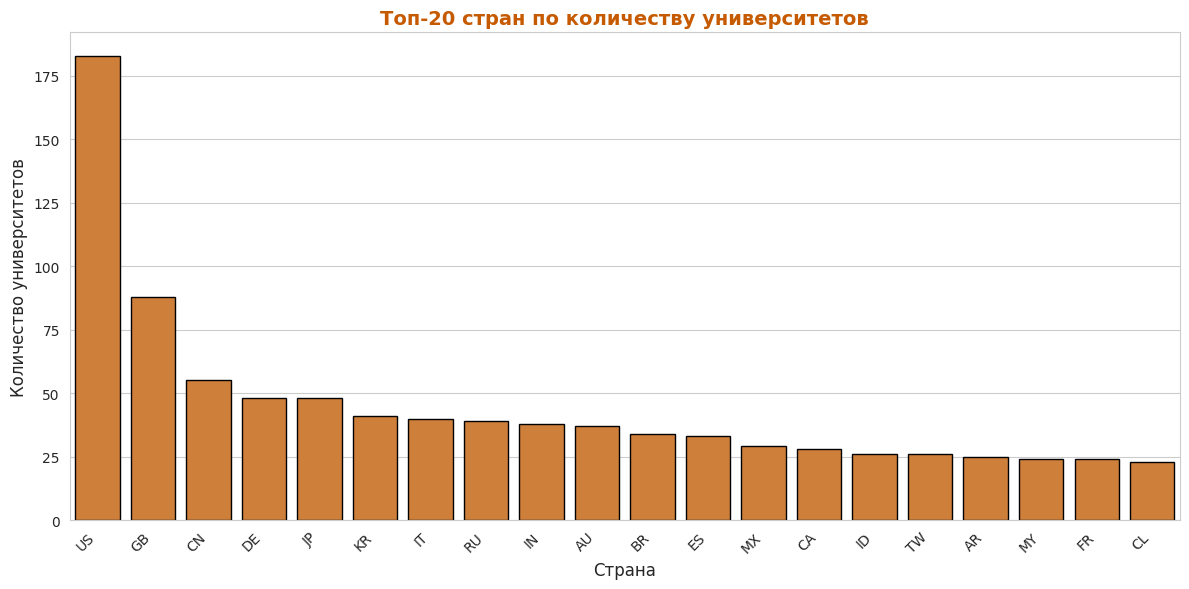

In [319]:
col = "country"
country_counts = data[col].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(
    x=country_counts.index,
    y=country_counts.values,
    color="#e67e22",
    edgecolor="black"
)

plt.title("Топ-20 стран по количеству университетов", fontsize=14, weight='bold', color="#c65a00")
plt.xlabel("Страна", fontsize=12)
plt.ylabel("Количество университетов", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


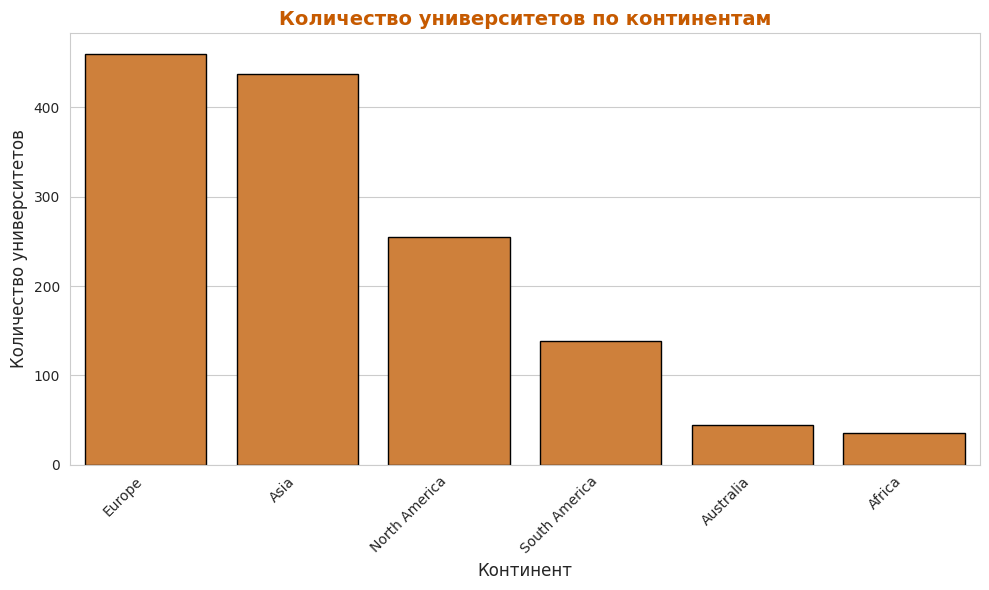

In [320]:
col = "continent"
continent_counts = data[col].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(
    x=continent_counts.index,
    y=continent_counts.values,
    color="#e67e22",
    edgecolor="black"
)

plt.title("Количество университетов по континентам", fontsize=14, weight='bold', color="#c65a00")
plt.xlabel("Континент", fontsize=12)
plt.ylabel("Количество университетов", fontsize=12)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [321]:
data.columns.tolist()

['name',
 'country',
 'qs_ranking_preview',
 'location_full',
 'establishment_year',
 'total_students',
 'international_students',
 'female_students',
 'acceptance_rate',
 'gdp',
 'unemployment_rate',
 'school_enrollment_tert',
 'adult_literacy_rate',
 'economic_freedom_score',
 'continent',
 'avg_bachelor',
 'avg_master',
 'university_age',
 'qs_rank_inverted',
 'acceptance_rate_inverted',
 'gdp_log',
 'unemployment_rate_log',
 'economic_freedom_score_log',
 'avg_bachelor_log',
 'avg_master_log']

# Связь каждого признака с целевой переменной, а также попарные корреляции (в том числе и в особенности с таргетом). Визуализировать попарные распределения признаков и корреляции наиболее значимых.

Построить подходящие сводные таблицы и прочие диаграммы.

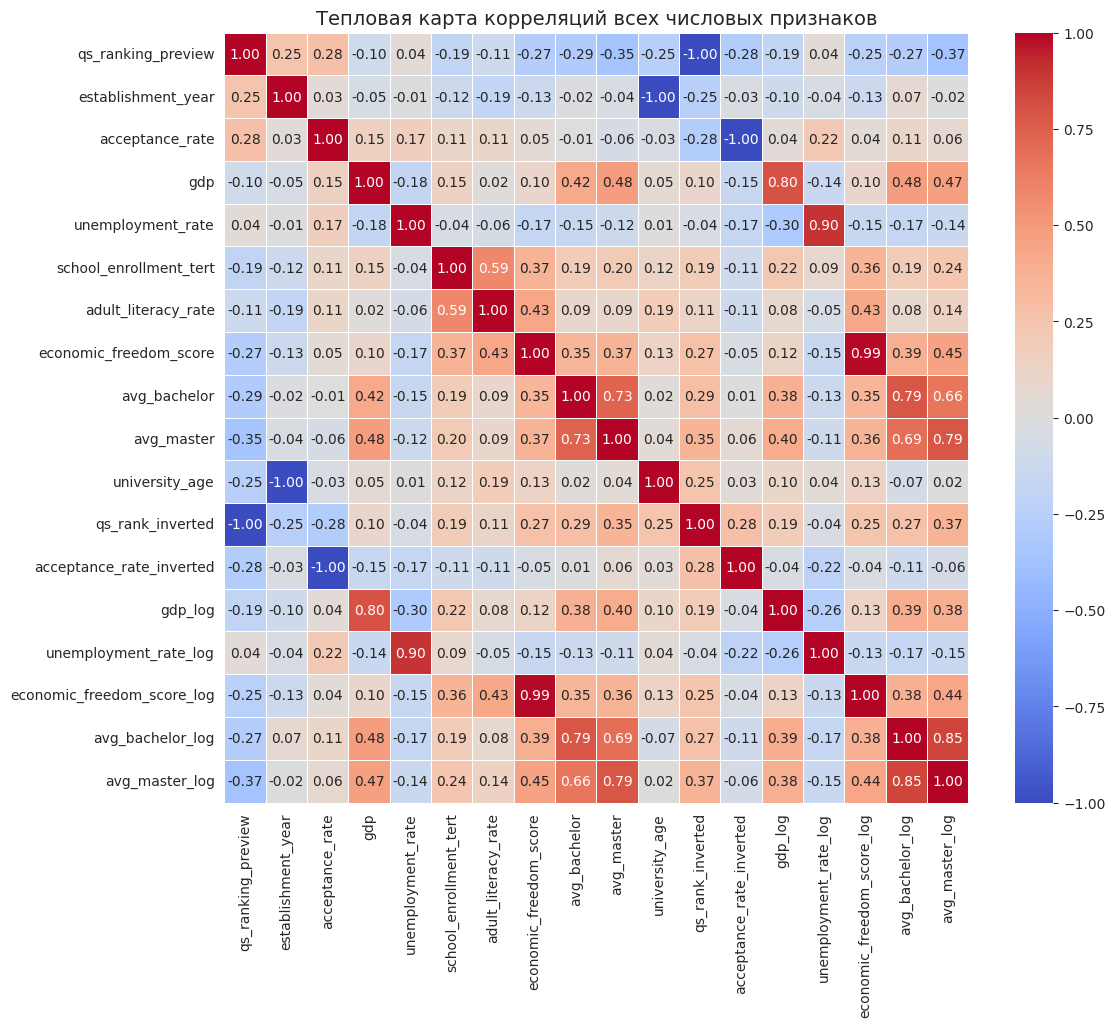

In [322]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    data.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Тепловая карта корреляций всех числовых признаков", fontsize=14)
plt.show()

In [323]:
corr_qs = data.corr(numeric_only=True)['qs_rank_inverted'].sort_values()
corr_qs

,qs_rank_inverted
qs_ranking_preview,-1.000000
acceptance_rate,-0.275142
establishment_year,-0.252670
unemployment_rate,-0.042873
unemployment_rate_log,-0.037453
gdp,0.100269
adult_literacy_rate,0.112646
gdp_log,0.188893
school_enrollment_tert,0.189165
economic_freedom_score_log,0.249020


In [324]:
import pycountry

def country_to_english(name):
    try:
        return pycountry.countries.lookup(name).name
    except:
        return None

data['country_plotly'] = data['country'].apply(country_to_english)
data = data.dropna(subset=['country_plotly'])
data

,name,country,qs_ranking_preview,location_full,establishment_year,total_students,international_students,female_students,acceptance_rate,gdp,...,avg_master,university_age,qs_rank_inverted,acceptance_rate_inverted,gdp_log,unemployment_rate_log,economic_freedom_score_log,avg_bachelor_log,avg_master_log,country_plotly
0,Massachusetts Institute of Technology,US,1.0,"Boston, United States",1861.0,"11,839","3,650",40%,4.0,2.918489e+13,...,102995.0,164.0,1401.0,96.0,31.004672,1.630416,4.251348,11.034744,11.542445,United States
1,Imperial College London,GB,2.0,"London, United Kingdom",1907.0,"20,135","10,965",40%,NaN,3.643834e+12,...,52830.5,118.0,1400.0,NaN,28.924058,1.631395,4.238445,10.957216,10.874863,United Kingdom
2,University of Oxford,GB,3.0,"Oxford, United Kingdom",1096.0,"20,785","7,565",47%,23.0,3.643834e+12,...,70007.0,929.0,1399.0,77.0,28.924058,1.631395,4.238445,11.839477,11.156365,United Kingdom
3,Harvard University,US,4.0,"Cambridge, United States",1636.0,"29,236","10,077",50%,3.0,2.918489e+13,...,42907.5,389.0,1398.0,97.0,31.004672,1.630416,4.251348,10.435057,10.666825,United States
4,University of Cambridge,GB,5.0,"Cambridge, United Kingdom",1318.0,"19,875","7,340",47%,12.0,3.643834e+12,...,40768.0,707.0,1397.0,88.0,28.924058,1.631395,4.238445,10.538489,10.615677,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,Politehnica University of Timi╚Öoara,RO,1401.0,"Timisoara, Romania",1920.0,"19,999",375,NaN,60.0,3.827676e+11,...,2746.0,105.0,1.0,40.0,26.670694,1.853011,4.197202,7.918265,7.918265,Romania
1367,"La Salle University, Colombia",CO,1401.0,"Bogota, Colombia",1964.0,"9,869",95,NaN,NaN,4.185420e+11,...,NaN,61.0,1.0,NaN,26.760043,2.361608,4.091006,NaN,NaN,Colombia
1368,University of Santander,CO,1401.0,"Bucaramanga, Colombia",1985.0,"18,384",217,61%,NaN,4.185420e+11,...,NaN,40.0,1.0,NaN,26.760043,2.361608,4.091006,NaN,NaN,Colombia
1369,Korkyt Ata Kyzylorda State University,KZ,1401.0,"Kyzylorda, Kazakhstan",1937.0,"14,999",39,NaN,NaN,2.884061e+11,...,NaN,88.0,1.0,NaN,26.387636,1.756823,4.155753,NaN,NaN,Kazakhstan


In [326]:
weights_sum = 0.36 + 0.29 + 0.27 + 0.25 + 0.25 + 0.19 + 0.19

In [329]:
import plotly.express as px

cols = [
    'avg_master_log', 'avg_bachelor_log', 'economic_freedom_score',
    'acceptance_rate_inverted', 'university_age',
    'gdp_log', 'school_enrollment_tert'
]

# стандартизация признаков (0–1) - чтобы привести все показатели к одной шкале. Теперь каждый фактор показывает, насколько страна отклоняется от мирового среднего уровня. Это делает итоговый индекс честным и сопоставимым между странами.
for col in cols:
    data[f'{col}_std'] = (data[col] - data[col].mean()) / data[col].std()

data['attractiveness_index'] = (
    (0.36/1.8) * data['avg_master_log_std'] +
    (0.29/1.8) * data['avg_bachelor_log_std'] +
    (0.27/1.8) * data['economic_freedom_score_std'] +
    (0.25/1.8) * data['acceptance_rate_inverted_std'] +
    (0.25/1.8) * data['university_age_std'] +
    (0.19/1.8) * data['gdp_log_std'] +
    (0.19/1.8) * data['school_enrollment_tert_std']
)

country_index = (
    data.groupby('country_plotly', as_index=False)
    .agg({
        'avg_master_log': 'mean',
        'avg_bachelor_log': 'mean',
        'economic_freedom_score': 'mean',
        'acceptance_rate_inverted': 'mean',
        'university_age': 'mean',
        'gdp_log': 'mean',
        'school_enrollment_tert': 'mean',
        'attractiveness_index': 'mean'
    })
)

fig = px.choropleth(
    country_index,
    locations='country_plotly',
    locationmode='country names',
    color='attractiveness_index',
    color_continuous_scale='YlOrBr',
    title='Интегральный индекс привлекательности стран для открытия кампуса',
    hover_name='country_plotly',
    hover_data={
        'attractiveness_index': ':.2f',
        'avg_master_log': ':.2f',
        'economic_freedom_score': ':.2f',
        'acceptance_rate_inverted': ':.2f'
    }
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    title_x=0.5,
    title_font=dict(size=18)
)

fig.show()

In [328]:
# считаем средний индекс по каждой стране
country_mean = (
    data.groupby('country_plotly', as_index=False)['attractiveness_index']
    .mean()
    .sort_values('attractiveness_index', ascending=False)
)

top_countries = country_mean.head(10).reset_index(drop=True)
top_countries

,country_plotly,attractiveness_index
0,Ireland,0.828991
1,United Kingdom,0.722263
2,United States,0.693971
3,Portugal,0.661713
4,Australia,0.652721
5,Finland,0.632178
6,Sweden,0.503688
7,Canada,0.423865
8,Netherlands,0.381160
9,New Zealand,0.340578


# Выводы

Если проведенный вами анализ позволяет сделать какие-либо выводы, постараться сформулировать их максимально глубоко и развернуто.

Упомянуть, как можно задействовать в дальнейшем приобретенные вами на этом этапе знания в решаемой задаче.

Ключевые выводы:

	•	Максимальная привлекательность у стран с высокой экономической свободой и устойчивой экономикой.
	•	Ирландия, Великобритания и Португалия — оптимальные локации для старта нового кампуса.
	•	Скандинавские страны — перспективны для инновационных и устойчивых образовательных форматов.
	•	США и Австралия — премиальные, но высококонкурентные рынки.

